# 1. Import libraries

In [67]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image


# 2.Data Preparation

### 2.1 Define the path to the  dataset directory

In [68]:
# Define the path to dataset directory
dataset_dir = "/kaggle/input/slash-dataset/slash_dataset"

### 2.2 List the folders in the dataset directory

In [69]:
# List the folders in the dataset directory
categories = ['Accessories', 'Beauty', 'Fashion']

### 2.3 Create 2 lists to store file paths and  labels

In [70]:
# Create 2 lists to store file paths and  labels
file_paths = []
labels = []

### 2.4 Iterate over each category

In [71]:
# Iterate over each category folder to append file paths and  labels to lists
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    files = os.listdir(category_dir)
    # Append the file paths to the file_paths list
    file_paths.extend([os.path.join(category_dir, file) for file in files])
    # Append labels which is the (category index) to the labels list
    labels.extend([categories.index(category)] * len(files))

### 2.5 Split The Dataset Into Training and Testing Sets by Train_Test_Spilt

In [72]:
# Split the dataset into training and testing sets
train_file_paths, test_file_paths, train_labels, test_labels = train_test_split(
    file_paths, labels, test_size=0.2, random_state=42)


### 2.6 Printng The Number Of Samples in Each Category

In [73]:
# printng  the number of samples in each  category of slash dataet
print(f"Number of training samples: {len(train_file_paths)}")
print(f"Number of testing samples: {len(test_file_paths)}")

Number of training samples: 80
Number of testing samples: 20


In [74]:
print(f"Number of testing samples: {len(val_images)}")


Number of testing samples: 2


### 2.7 Printing  the distribution of labels in each category

In [75]:
#printing  the distribution of labels in each category
from collections import Counter
train_label_distribution = Counter(train_labels)
test_label_distribution = Counter(test_labels)
print("Training label distribution:", train_label_distribution)
print("Testing label distribution:", test_label_distribution)

Training label distribution: Counter({0: 31, 2: 30, 1: 19})
Testing label distribution: Counter({0: 10, 2: 7, 1: 3})


### 2.8 Load Train images and Test Images

In [76]:
# Define a function to load an image as an array
def load_image_as_array(file_path, target_size=(224, 224)):
    image = Image.open(file_path)
    image = image.resize(target_size)
    array = np.array(image) / 255.0  # it for Normalize pixel values between 0, 1
    return array

In [77]:

train_images = []
test_images = []


### 2.9 Load images as arrays

In [78]:
# Load train images
for file_path in train_file_paths:
    img = load_image_as_array(file_path) 
    train_images.append(img)

# Load test images
for file_path in test_file_paths:
    img = load_image_as_array(file_path) 
    test_images.append(img)



### 2.10 Convert lists to numpy arrays

In [79]:
# Convert lists to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [80]:
#Split test_data into  val, test
val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)
val_labels, test_labels = train_test_split(test_labels, test_size=0.5, random_state=42)

In [81]:
# Convert  labels to one-hot encoded labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=3)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=3)
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels, num_classes=3)

# 3. Model Building

In [82]:
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False

In [83]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])




In [84]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4.Model Training

In [85]:
# Train the model on the training dataset
history = model.fit(
    train_images,
    train_labels_one_hot,
    epochs=10,
    validation_data=(val_images, val_labels_one_hot)
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.3672 - loss: 3.5485 - val_accuracy: 0.4000 - val_loss: 2.0416
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step - accuracy: 0.6016 - loss: 2.1706 - val_accuracy: 0.7000 - val_loss: 2.2503
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.8047 - loss: 0.8616 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step - accuracy: 0.8766 - loss: 0.5103 - val_accuracy: 1.0000 - val_loss: 0.0207
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.9398 - loss: 0.3609 - val_accuracy: 0.7000 - val_loss: 1.4772
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.9516 - loss: 0.3142 - val_accuracy: 0.6000 - val_loss: 1.6558
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.9016 - loss: 0.3163 - val_accuracy: 0.9000 - val_loss: 0.2749
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.9898 - loss: 0.0282 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 9/

# 5.Model Validation

### 5.1 Evaluate the model 

In [86]:
## Evaluate the model on the val dataset
val_loss, val_accuracy = model.evaluate(val_images,val_labels_one_hot)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0020
Validation loss: 0.001990999560803175, Validation accuracy: 1.0


#### 5.2 Visualization of Loss and Accuracy

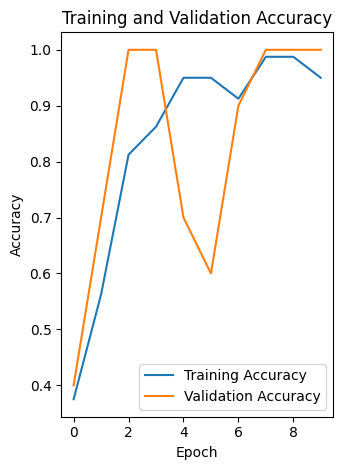

In [87]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

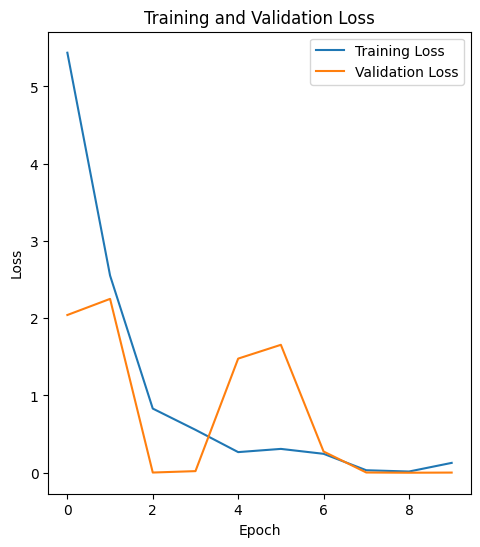

In [88]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 6.Fine-Tuning

*    fine-tune the model by unfreezing some of the layers and retraining them with a lower learning rate. This for helping in improve performance on my specific task

In [89]:
# Unfreeze some layers for fine-tuning
base_model.trainable = True

In [90]:
# Fine-tune from this layer 
fine_tune_at = 100  
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [91]:
# Compileing  model with a lower learning rate for making  fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
#Fine-tune the model
history_fine = model.fit(train_images,
                         train_labels_one_hot,
                         epochs=10,  
                         validation_data=(val_images, val_labels_one_hot))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 8s/step - accuracy: 0.9898 - loss: 0.0297 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 1.0000 - loss: 7.3548e-04 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.9898 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 1.0000 - loss: 2.0573e-04 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 0.9898 - loss: 0.0514 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 1.0000 - loss: 4.1450e-04 - val_accuracy: 1.0000 - val_loss: 0.0

### 6.1 Evaluate model on the test dataset After Fine-tune 

In [93]:
## Evaluate the model on the test dataset after Fine-tune the model
val_loss, val_accuracy = model.evaluate(val_images, val_labels_one_hot)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0238
Validation loss: 0.023751607164740562, Validation accuracy: 1.0


### 6.2 Confusion Matrix for Model After Fine-tune

In [94]:
# the predictions for training and testing datasets
train_predictions = np.argmax(model.predict(train_images), axis=1)
test_predictions = np.argmax(model.predict(test_images), axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [95]:
# Create confusion matrices
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(val_labels, test_predictions)

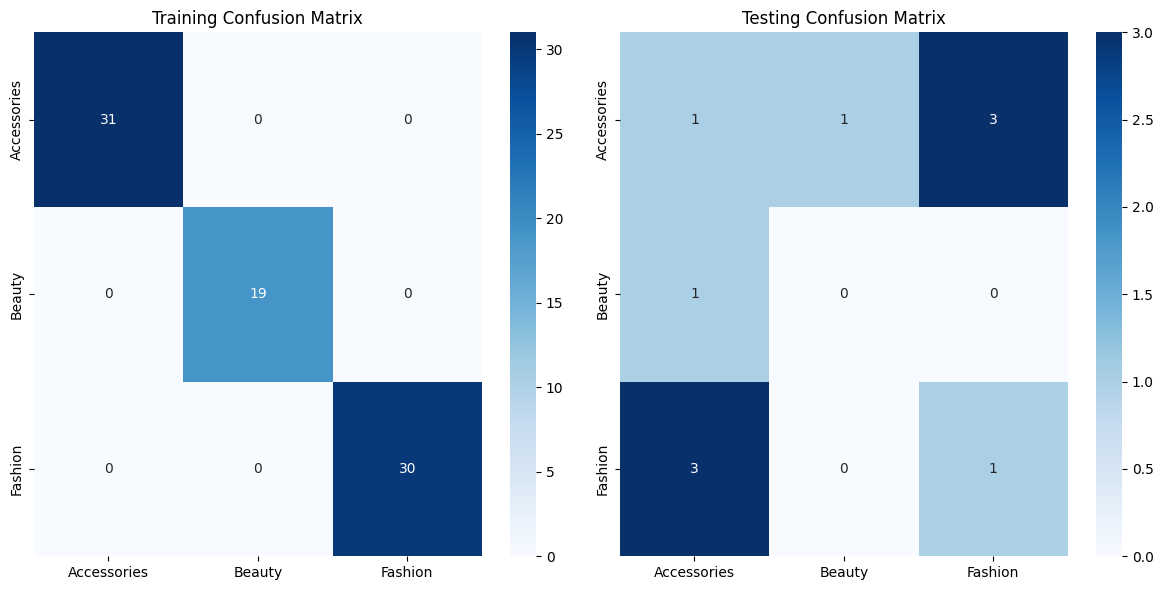

In [96]:
# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Training Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Testing Confusion Matrix')

plt.tight_layout()
plt.show()


### 6.3 Visualization of Loss and Accuracy After Fune Tuning

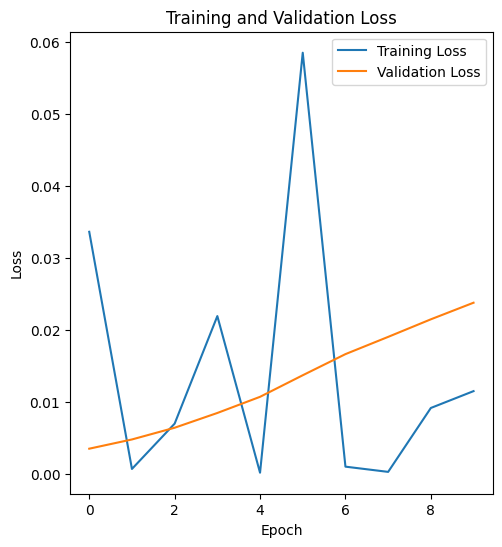

In [97]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

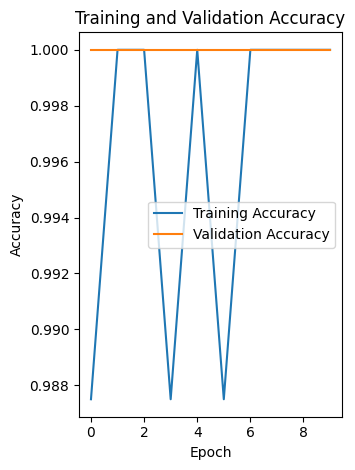

In [98]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Testing

In [99]:
## Evaluate the model on the test dataset
val_loss, val_accuracy = model.evaluate(test_images,test_labels_one_hot)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9000 - loss: 0.2356
Validation loss: 0.23563948273658752, Validation accuracy: 0.8999999761581421


# 8. Save Model

ValueError: Unable to synchronously create dataset (name already exists)